In [112]:
import pandas as pd
import seaborn as sns
import numpy as np

In [113]:
def check_balance_help(df):
    print('Number of Helpful: ', len(df[df['Helpfulness_Label'] == 0]))
    print('Number of Unhelpful: ', len(df[df['Helpfulness_Label'] == 1]))
    helpfulness_rate = round((len(df[df['Helpfulness_Label'] == 0]) / len(df)) * 100 , 2)
    unhelpfulness_rate = round((len(df[df['Helpfulness_Label'] == 1]) / len(df)) * 100 , 2)
    print(f'The ratio of the dataset is (helpful / unhelpful): {helpfulness_rate}% / {unhelpfulness_rate}%')

In [114]:
#Import dataset
df=pd.read_excel('After_data_preperation.xlsx')

In [115]:
df

,Product_Score,Average_Product_Score,Product_Category,Reviewer_Helpfulness,Reviewer_Activity,Review Count,Total_Reads,Sentimental_Summary_Score,Sentimental_Text_Score,SVD Text1,SVD Text2,SVD Text3,SVD Summary1,SVD Summary2,SVD Summary3,Text_Topic,Cluster,Helpfulness_Label
0,0.00,0.628364,0.25,0.428571,0.000000,0.140998,0.060606,0.726477,0.996446,0.630512,0.714219,0.367690,1.945433e-03,0.426293,0.468195,1.00,1,1
1,1.00,0.706540,0.25,0.125000,0.031100,0.136659,0.000000,0.837293,0.972231,0.569522,0.720136,0.402520,8.535865e-01,1.000000,0.435683,1.00,1,1
2,0.50,0.819664,0.50,0.680851,0.078947,0.286334,0.050505,0.308357,0.916743,0.318330,0.286570,0.318150,1.415849e-29,0.427254,0.466002,0.00,0,1
3,0.75,0.521095,0.50,0.500000,0.016746,0.720174,0.000000,0.887135,0.821759,0.414758,0.149276,0.272508,4.314153e-01,0.190954,0.186568,0.75,0,1
4,1.00,0.799080,0.50,1.000000,0.002392,0.060738,0.000000,0.823725,0.893847,0.266717,0.182181,0.729970,1.474024e-02,0.419654,0.462299,0.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,1.00,0.618416,0.50,0.333333,0.043062,0.138829,0.010101,0.855402,0.957661,0.142811,0.348395,0.352616,8.798596e-01,0.750000,0.605193,0.25,0,1
2362,0.75,0.734149,0.50,0.222222,0.040670,0.147505,0.000000,0.484577,0.933394,0.246212,0.212248,0.316485,4.624016e-03,0.425181,0.470656,0.75,0,1
2363,0.75,0.720370,0.25,0.800000,0.081340,0.147505,0.000000,0.830647,0.997665,0.800877,0.725555,0.367538,4.420398e-01,0.211594,0.976028,1.00,1,0
2364,1.00,0.515963,1.00,0.327586,0.107656,0.973970,0.000000,0.386055,0.961316,0.159753,0.344656,0.292554,3.826760e-02,0.435551,0.463512,0.25,0,0


In [116]:
check_balance_help(df)

Number of Helpful:  984
Number of Unhelpful:  1382
The ratio of the dataset is (helpful / unhelpful): 41.59% / 58.41%


## Split data into training and testing

In [195]:
y = df["Helpfulness_Label"]

In [194]:
x = df.drop(["Helpfulness_Label"], axis=1)
display(x)

,Product_Score,Average_Product_Score,Product_Category,Reviewer_Helpfulness,Reviewer_Activity,Review Count,Total_Reads,Sentimental_Summary_Score,Sentimental_Text_Score,SVD Text1,SVD Text2,SVD Text3,SVD Summary1,SVD Summary2,SVD Summary3,Text_Topic,Cluster
0,0.00,0.628364,0.25,0.428571,0.000000,0.140998,0.060606,0.726477,0.996446,0.630512,0.714219,0.367690,1.945433e-03,0.426293,0.468195,1.00,1
1,1.00,0.706540,0.25,0.125000,0.031100,0.136659,0.000000,0.837293,0.972231,0.569522,0.720136,0.402520,8.535865e-01,1.000000,0.435683,1.00,1
2,0.50,0.819664,0.50,0.680851,0.078947,0.286334,0.050505,0.308357,0.916743,0.318330,0.286570,0.318150,1.415849e-29,0.427254,0.466002,0.00,0
3,0.75,0.521095,0.50,0.500000,0.016746,0.720174,0.000000,0.887135,0.821759,0.414758,0.149276,0.272508,4.314153e-01,0.190954,0.186568,0.75,0
4,1.00,0.799080,0.50,1.000000,0.002392,0.060738,0.000000,0.823725,0.893847,0.266717,0.182181,0.729970,1.474024e-02,0.419654,0.462299,0.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,1.00,0.618416,0.50,0.333333,0.043062,0.138829,0.010101,0.855402,0.957661,0.142811,0.348395,0.352616,8.798596e-01,0.750000,0.605193,0.25,0
2362,0.75,0.734149,0.50,0.222222,0.040670,0.147505,0.000000,0.484577,0.933394,0.246212,0.212248,0.316485,4.624016e-03,0.425181,0.470656,0.75,0
2363,0.75,0.720370,0.25,0.800000,0.081340,0.147505,0.000000,0.830647,0.997665,0.800877,0.725555,0.367538,4.420398e-01,0.211594,0.976028,1.00,1
2364,1.00,0.515963,1.00,0.327586,0.107656,0.973970,0.000000,0.386055,0.961316,0.159753,0.344656,0.292554,3.826760e-02,0.435551,0.463512,0.25,0


In [130]:
x_train, x_test, y_train, y_test = train_test_split(x, y,stratify=y,test_size=0.2, random_state=42)
# df_test = x_test.drop(["Helpfulness_Label"],axis=1) # remove label for testing set

In [131]:
display(x_train)

,Product_Score,Average_Product_Score,Product_Category,Reviewer_Helpfulness,Reviewer_Activity,Review Count,Total_Reads,Sentimental_Summary_Score,Sentimental_Text_Score,SVD Text1,SVD Text2,SVD Text3,SVD Summary1,SVD Summary2,SVD Summary3,Text_Topic,Cluster
1144,0.75,0.600276,0.50,1.000000,0.002392,0.143167,0.010101,0.991361,0.585085,0.224752,0.249235,0.254978,2.032142e-02,0.421198,0.465563,0.00,0
1009,0.25,0.431764,0.25,0.000000,0.035885,0.160521,0.010101,0.684610,0.144025,0.171870,0.398689,0.371167,7.576335e-02,0.402863,0.592903,1.00,1
913,0.50,0.318621,0.50,0.718750,0.100478,0.008677,0.000000,0.192889,0.235049,0.175019,0.314900,0.324723,1.051478e-01,0.383342,0.534058,0.00,0
1768,0.75,0.357352,0.50,0.666667,0.007177,1.000000,0.000000,0.372543,0.993756,0.464392,0.207550,0.263904,7.095060e-03,0.423877,0.465206,0.75,0
488,0.25,0.564801,0.50,0.553191,0.074163,0.559653,0.000000,0.220579,0.894710,0.335007,0.236426,0.527890,4.133239e-03,0.425119,0.466225,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0.75,0.846177,0.50,0.880952,0.088517,0.290672,0.000000,0.690369,0.998680,0.448369,0.182369,0.261361,9.800435e-02,0.380730,0.563235,0.00,0
1183,0.75,0.515963,1.00,0.583333,0.021531,0.973970,0.000000,0.855402,0.963448,0.320557,0.276485,0.213799,8.535865e-01,1.000000,0.435683,0.25,0
134,1.00,0.874425,0.50,0.949887,0.179426,0.041215,0.020202,0.484577,0.975429,0.209904,0.294502,0.329243,6.419589e-02,0.406251,0.491906,0.50,0
2261,0.25,0.583096,0.25,1.000000,0.000000,0.154013,0.010101,0.441823,0.205706,0.751885,0.790812,0.375185,3.402820e-111,0.427254,0.466002,1.00,1


In [132]:
check_balance_help(df)

Number of Helpful:  984
Number of Unhelpful:  1382
The ratio of the dataset is (helpful / unhelpful): 41.59% / 58.41%


In [133]:
# Alternative to split a dataframe
# sample_df = df.groupby('Helpfulness_Label').apply(lambda x: x.sample(frac=0.3))

## Train model

In [134]:
def train_model(x_train, y_train):
    ##Setup Models
    #Initialise models 
    from sklearn.neural_network import MLPClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    NN = MLPClassifier(hidden_layer_sizes=(25, 25, 25), max_iter=10000, shuffle=True)
    DT= DecisionTreeClassifier(max_depth=10, random_state=42)
    RF = RandomForestClassifier(n_estimators= 100, random_state=42)
    
    #Fit models
    NN = NN.fit(x_train, y_train)
    DT = DT.fit(x_train, y_train)
    RF = RF.fit(x_train, y_train)
    
    return NN, DT, RF


In [136]:
NN, DT, RF = train_model(x_train, y_train)

## Apply model

In [147]:
NN_pred = NN.predict(x_test)
DT_pred = DT.predict(x_test)
RF_pred = RF.predict(x_test)

## Test model performance

In [233]:
from sklearn.metrics import classification_report, confusion_matrix
target_names = ["Helpful", "Unhelpful"]
print("NN model outcome\n", classification_report(y_test, NN_pred, target_names=target_names))
print("DT model outcome\n", classification_report(y_test, DT_pred, target_names=target_names))
print("RF model outcome\n", classification_report(y_test, RF_pred, target_names=target_names))

NN model outcome
               precision    recall  f1-score   support

     Helpful       0.64      0.78      0.71       197
   Unhelpful       0.82      0.69      0.75       277

    accuracy                           0.73       474
   macro avg       0.73      0.74      0.73       474
weighted avg       0.75      0.73      0.73       474

DT model outcome
               precision    recall  f1-score   support

     Helpful       0.68      0.74      0.71       197
   Unhelpful       0.80      0.75      0.78       277

    accuracy                           0.75       474
   macro avg       0.74      0.75      0.74       474
weighted avg       0.75      0.75      0.75       474

RF model outcome
               precision    recall  f1-score   support

     Helpful       0.74      0.78      0.76       197
   Unhelpful       0.84      0.81      0.82       277

    accuracy                           0.79       474
   macro avg       0.79      0.79      0.79       474
weighted avg       0

In [173]:
confusion_matrix(y_test, NN_pred)

array([[147,  50],
       [ 81, 196]], dtype=int64)

## ROC Evaluation

In [167]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

#Function to setup data for ROC curves
def setup_roc(model, x_test, y_test):    
    #Allocate ROC values
    fpr, tpr, threshold = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

def roc(m1, m2, m3, x_test, y_test):   
    fpr_mean_NN, tpr_mean_NN, roc_auc_mean_NN = 0,0,0
    fpr_mean_DT, tpr_mean_DT, roc_auc_mean_DT = 0,0,0
    fpr_mean_RF, tpr_mean_RF, roc_auc_mean_RF = 0,0,0

    iterations = 5
    for r in range(0, iterations):
        ##Setup each model
        #MLP Test
        fpr1, tpr1, roc_auc1 = setup_roc(m1, x_test, y_test)
        fpr_mean_NN += fpr1
        tpr_mean_NN += tpr1 
        roc_auc_mean_NN += roc_auc1

        #DT Test
        fpr2, tpr2, roc_auc2 = setup_roc(m2, x_test, y_test)
        fpr_mean_DT += fpr2
        tpr_mean_DT += tpr2
        roc_auc_mean_DT += roc_auc2

        #RF Test
        fpr3, tpr3, roc_auc3 = setup_roc(m3, x_test, y_test)
        fpr_mean_RF += fpr3
        tpr_mean_RF += tpr3 
        roc_auc_mean_RF += roc_auc3
    
    #Average all values
    fpr_mean_NN/=iterations
    tpr_mean_NN/=iterations
    roc_auc_mean_NN/=iterations 
    
    fpr_mean_DT/=iterations 
    tpr_mean_DT/=iterations
    roc_auc_mean_DT/=iterations 
    
    fpr_mean_RF/=iterations
    tpr_mean_RF/=iterations 
    roc_auc_mean_RF/=iterations
    
    #Plot ROC
    plt.figure()
    plt.title('Helpfulness Label Classfication ROC Curves of:')
    plt.plot(fpr_mean_NN, tpr_mean_NN, label = f'NN Test AUC = {roc_auc_mean_NN:.2f}')
    plt.plot(fpr_mean_DT, tpr_mean_DT, label = f'DT Test AUC = {roc_auc_mean_DT:.2f}')
    plt.plot(fpr_mean_RF, tpr_mean_RF, label = f'RF Test AUC = {roc_auc_mean_RF:.2f}')
    plt.plot([0, 1], [0, 1], 'r--', label='Base AUC = 0.5')
    plt.legend(loc = 'lower right')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Sensitivity')
    plt.xlabel('Specificity')
    plt.show()

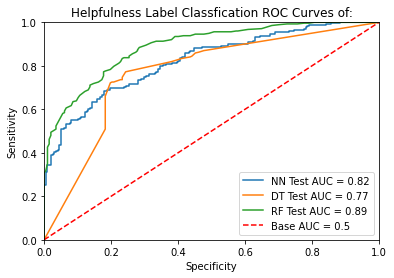

In [169]:
roc(NN, DT, RF, x_test, y_test) 
# According to ROC, RF is the best algorithm in this case.

## Pruning

Prune the Models

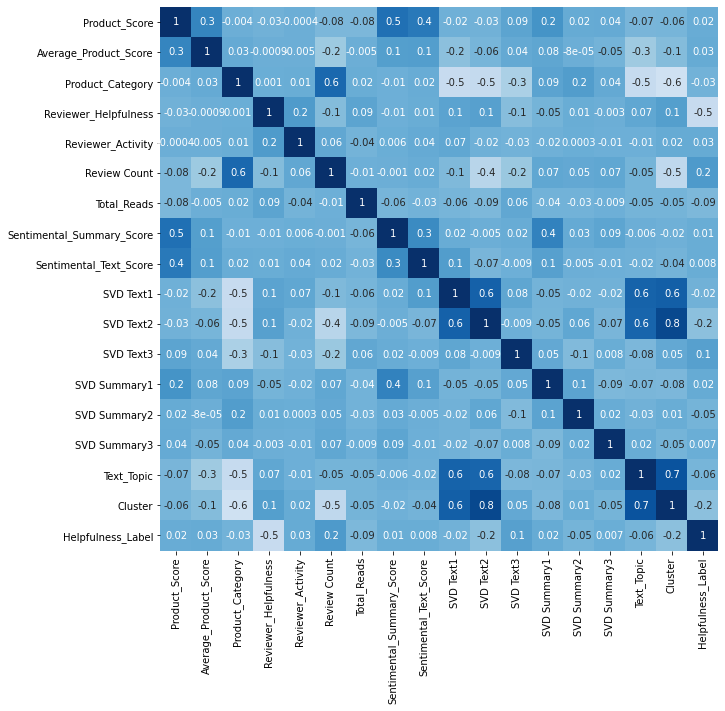

In [182]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap='Blues', cbar=False)

In [227]:
# Drop "Text_Topic" & "Cluster" because of their highly correlation relations with other features, then rerun the model 

In [228]:
x1 = df.drop(["Helpfulness_Label","Text_Topic","Cluster"], axis=1)
y1 = df["Helpfulness_Label"]
display(x1)

,Product_Score,Average_Product_Score,Product_Category,Reviewer_Helpfulness,Reviewer_Activity,Review Count,Total_Reads,Sentimental_Summary_Score,Sentimental_Text_Score,SVD Text1,SVD Text2,SVD Text3,SVD Summary1,SVD Summary2,SVD Summary3
0,0.00,0.628364,0.25,0.428571,0.000000,0.140998,0.060606,0.726477,0.996446,0.630512,0.714219,0.367690,1.945433e-03,0.426293,0.468195
1,1.00,0.706540,0.25,0.125000,0.031100,0.136659,0.000000,0.837293,0.972231,0.569522,0.720136,0.402520,8.535865e-01,1.000000,0.435683
2,0.50,0.819664,0.50,0.680851,0.078947,0.286334,0.050505,0.308357,0.916743,0.318330,0.286570,0.318150,1.415849e-29,0.427254,0.466002
3,0.75,0.521095,0.50,0.500000,0.016746,0.720174,0.000000,0.887135,0.821759,0.414758,0.149276,0.272508,4.314153e-01,0.190954,0.186568
4,1.00,0.799080,0.50,1.000000,0.002392,0.060738,0.000000,0.823725,0.893847,0.266717,0.182181,0.729970,1.474024e-02,0.419654,0.462299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,1.00,0.618416,0.50,0.333333,0.043062,0.138829,0.010101,0.855402,0.957661,0.142811,0.348395,0.352616,8.798596e-01,0.750000,0.605193
2362,0.75,0.734149,0.50,0.222222,0.040670,0.147505,0.000000,0.484577,0.933394,0.246212,0.212248,0.316485,4.624016e-03,0.425181,0.470656
2363,0.75,0.720370,0.25,0.800000,0.081340,0.147505,0.000000,0.830647,0.997665,0.800877,0.725555,0.367538,4.420398e-01,0.211594,0.976028
2364,1.00,0.515963,1.00,0.327586,0.107656,0.973970,0.000000,0.386055,0.961316,0.159753,0.344656,0.292554,3.826760e-02,0.435551,0.463512


In [229]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, stratify=y1, test_size=0.2, random_state=42)

In [230]:
NN, DT, RF = train_model(x1_train, y1_train)

In [231]:
NN_pred = NN.predict(x1_test)
DT_pred = DT.predict(x1_test)
RF_pred = RF.predict(x1_test)

In [232]:
target_names = ["Helpful", "Unhelpful"]
print("NN model outcome\n", classification_report(y1_test, NN_pred, target_names=target_names))
print("DT model outcome\n", classification_report(y1_test, DT_pred, target_names=target_names))
print("RF model outcome\n", classification_report(y1_test, RF_pred, target_names=target_names))

NN model outcome
               precision    recall  f1-score   support

     Helpful       0.64      0.78      0.71       197
   Unhelpful       0.82      0.69      0.75       277

    accuracy                           0.73       474
   macro avg       0.73      0.74      0.73       474
weighted avg       0.75      0.73      0.73       474

DT model outcome
               precision    recall  f1-score   support

     Helpful       0.68      0.74      0.71       197
   Unhelpful       0.80      0.75      0.78       277

    accuracy                           0.75       474
   macro avg       0.74      0.75      0.74       474
weighted avg       0.75      0.75      0.75       474

RF model outcome
               precision    recall  f1-score   support

     Helpful       0.74      0.78      0.76       197
   Unhelpful       0.84      0.81      0.82       277

    accuracy                           0.79       474
   macro avg       0.79      0.79      0.79       474
weighted avg       0

The model's performance has no significant difference from removing the highly correlated features.

## Apply K-fold cross validation

In [218]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from numpy import mean
from numpy import std

In [209]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)

scores = cross_val_score(RF, x1, y1, scoring='accuracy', cv=cv, n_jobs=-1)

In [214]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.821 (0.025)


In [219]:
scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
           'roc_auc': 'roc_auc'}
scores = cross_validate(RF, x1, y1, cv=cv, scoring=scoring)

In [226]:
print(f'Accuracy: {mean(scores["test_accuracy"]):.2f}')
print(f'Recall: {mean(scores["test_recall"]):.2f}')
print(f'Precision: {mean(scores["test_precision"]):.2f}')
print(f'AOU: {mean(scores["test_roc_auc"]):.2f}')


Accuracy: 0.82
Recall: 0.87
Precision: 0.83
AOU: 0.91


After pruning and apply 10-fold cross validation, the model's performance has increased and reached Accuracy:82% Recall:87%